In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Load Data

Langkah pertama yang dilakukan adalah meload dataset yang akan digunakan, dalam projek kali ini akan menggunakan dataset dengan tema anime atau kartun dari negara jepang

In [6]:
anime = pd.read_csv('/content/anime.csv')
rating = pd.read_csv('/content/rating.csv')

Masing masing dataset diberi nama sesuai dengan nama dataset untuk mempermudah langkah selanjutnya

Dataset dengan nama anime memiliki kolom anime_id, name, genre, type, episodes, rating, dan members

In [7]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Dataset dengan nama rating memiliki kolom user_id, anime_id, dan rating

In [8]:
print('Jumlah data anime: ', len(anime.name.unique()))
print('Jumlah data rating: ', len(rating.user_id.unique()))

Jumlah data anime:  12292
Jumlah data rating:  73515


Dapat disimpulkan dataset memiliki jumlah judul anime sebanyak 12292 dan jumlah user sebanyak 73515

#EDA

##Anime

###Deskripsi Variabel

In [14]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Variabel pada data anime:
- anime_id : Index setiap anime
- name : Judul anime
- genre : Genre anime
- type : Jenis penyiaran
- episodes : Jumlah episode
- rating : Rating anime
- Members : Jumlah member yang bergabung ke dalam komunitas

In [15]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Berdasarkan output diatas dapat disimpulkan dataset anime memiliki entri sebanyak 12294. Namun terdapat null value di beberapa variabel. Tindakan cleaning data perlu dilakukan.

###Univariate Analysis

In [18]:
print('Jumlah anime: ', len(anime.name.unique()))

Jumlah anime:  12292


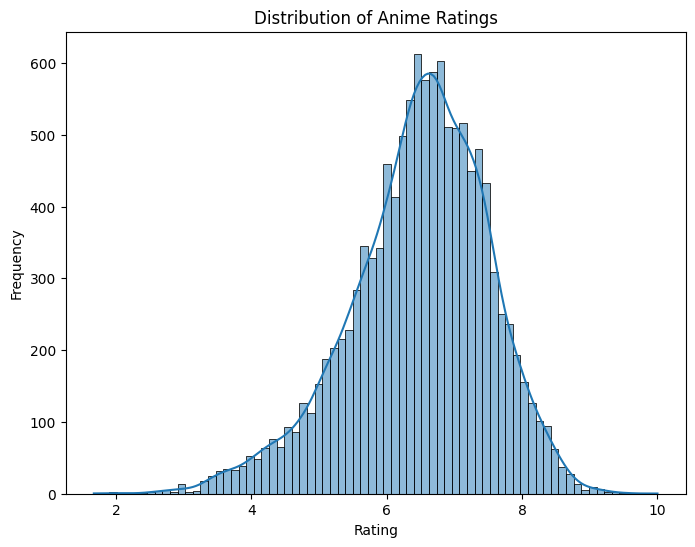

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(anime['rating'].dropna(), kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [17]:
max_rating = rating['rating'].max()
mean_rating = rating['rating'].mean()
min_rating = rating['rating'].min()

print(f"Max Rating: {max_rating}")
print(f"Mean Rating: {mean_rating}")
print(f"Min Rating: {min_rating}")

Max Rating: 10
Mean Rating: 6.144029546937656
Min Rating: -1


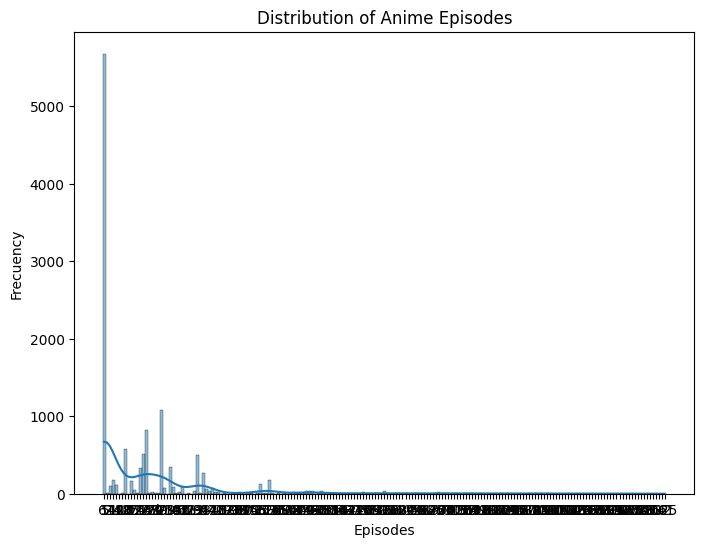

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(anime['episodes'].dropna(), kde=True, orientation='vertical')
plt.title('Distribution of Anime Episodes')
plt.ylabel('Frecuency')
plt.xlabel('Episodes')
plt.show()

In [31]:
print('Jumlah episode anime: ', len(anime.episodes.unique()))

Jumlah episode anime:  187


In [32]:
top_10_episodes = anime['episodes'].value_counts().nlargest(10)
top_10_episodes

,count
episodes,
1,5677
2,1076
12,816
13,572
26,514
3,505
Unknown,340
4,327
6,268


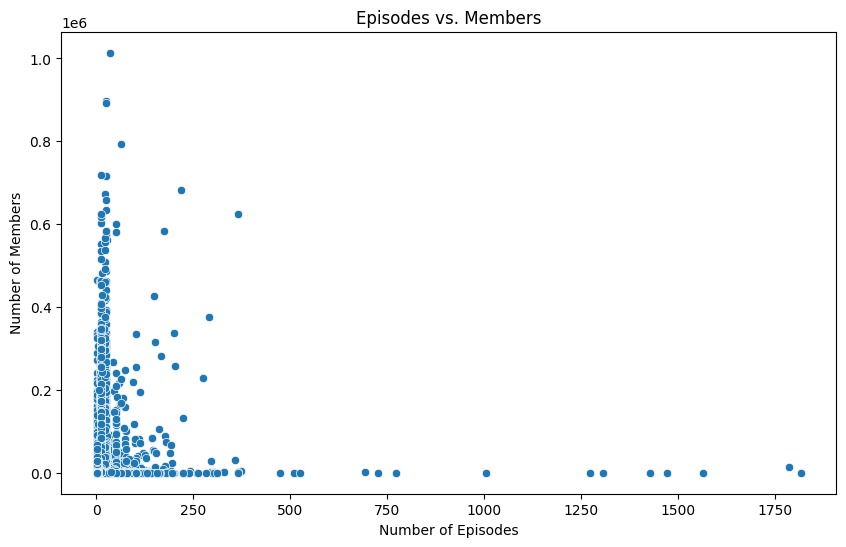

In [38]:
anime['members'] = anime['members'].fillna(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='episodes', y='members', data=anime)
plt.title('Episodes vs. Members')
plt.xlabel('Number of Episodes')
plt.ylabel('Number of Members')
plt.show()

In [39]:
high_member_anime = anime[anime['members'] > 100000]
print(high_member_anime[['name', 'episodes', 'members']])

                                   name  episodes  members
0                        Kimi no Na wa.       1.0   200630
1      Fullmetal Alchemist: Brotherhood      64.0   793665
2                              Gintama°      51.0   114262
3                           Steins;Gate      24.0   673572
4                         Gintama&#039;      51.0   151266
...                                 ...       ...      ...
6292                       Mahou Sensou      12.0   104192
6324                        School Days      12.0   279183
6975                    Diabolik Lovers      12.0   107960
6998                            Mayoiga      12.0   117090
10899       Shingeki no Kyojin Season 2       NaN   170054

[555 rows x 3 columns]


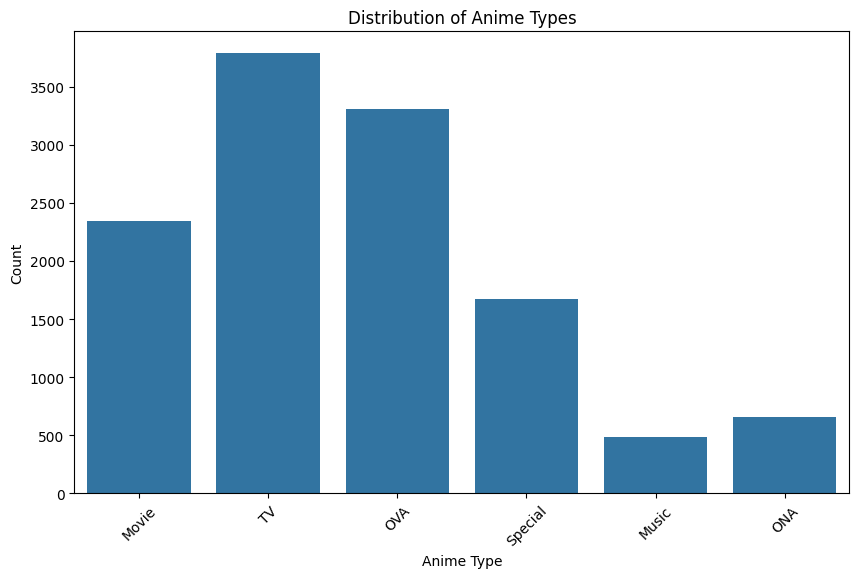

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=anime)
plt.title('Distribution of Anime Types')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

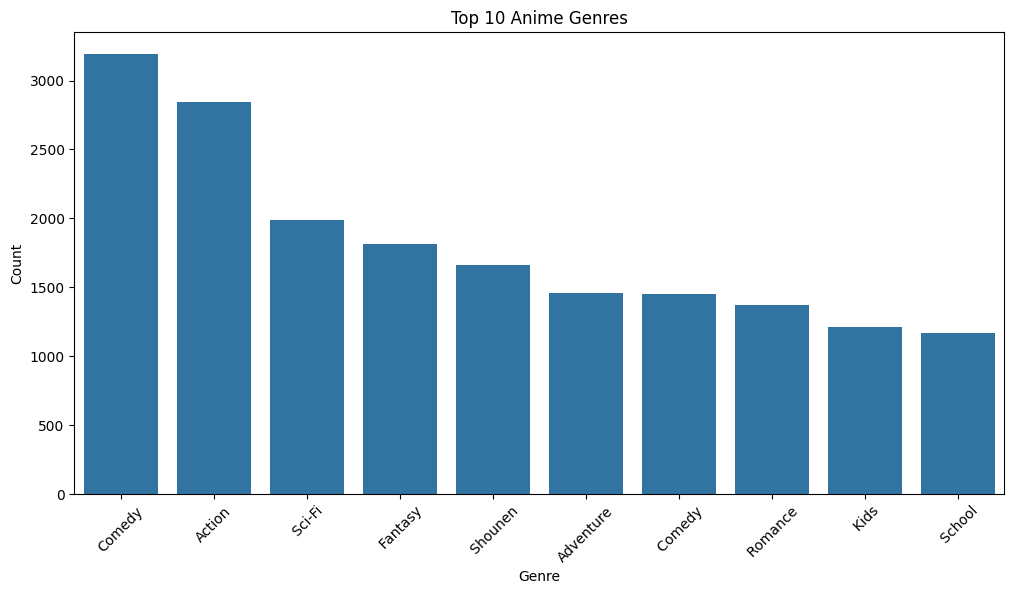

In [ ]:
genre_counts = anime['genre'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
unique_genres = []
for index in anime.index:
    genres = anime.loc[index, 'genre']
    if isinstance(genres, str):
      for genre in genres.split(','):
        genre = genre.strip()
        if genre not in unique_genres:
          unique_genres.append(genre)

print("Jumlah unik genre:", len(unique_genres))

Jumlah unik genre: 43


In [25]:
top_10_members = anime.sort_values(by='members', ascending=False).head(10)
top_10_members

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


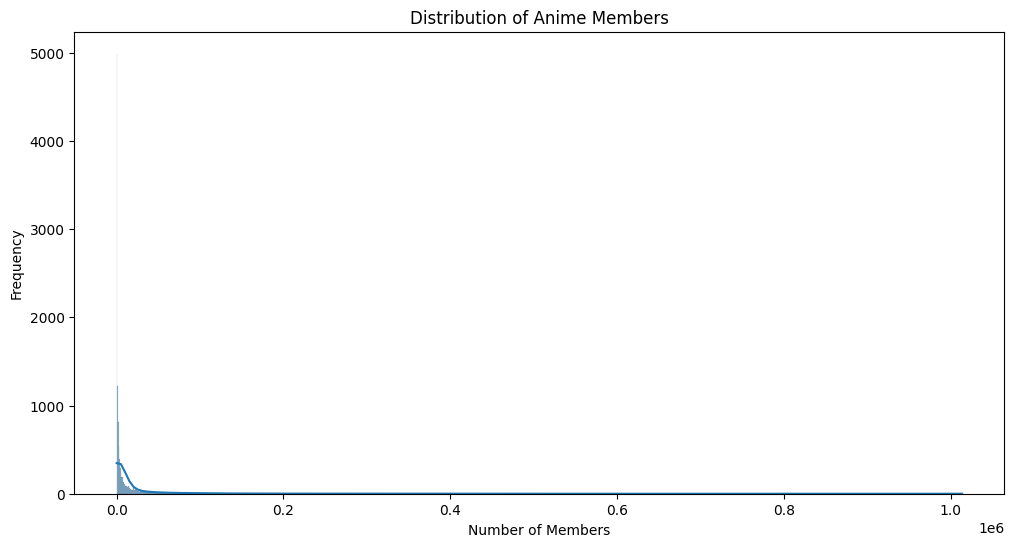

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(anime['members'], kde=True)
plt.title('Distribution of Anime Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.show()

###Multivariate Analysis

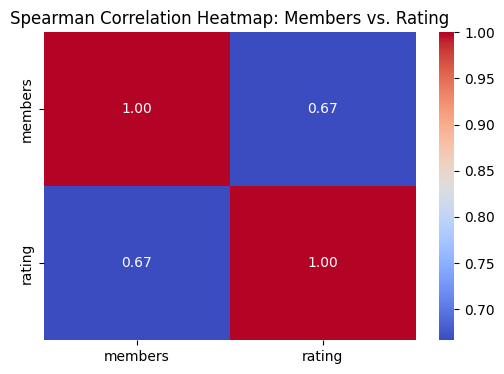

In [ ]:
members_rating_corr = anime['members'].corr(anime['rating'], method='spearman')
plt.figure(figsize=(6, 4))
sns.heatmap(anime[['members', 'rating']].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap: Members vs. Rating')
plt.show()

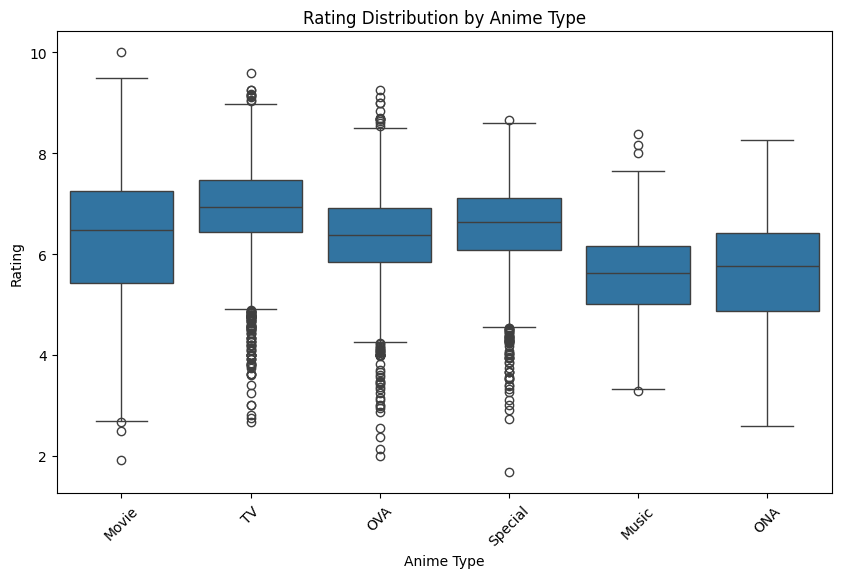

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=anime)
plt.title('Rating Distribution by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

###Data Preparation

####Cleaning Data

In [ ]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0
first_genre,0


In [ ]:
anime.dropna(subset=['genre'], inplace=True)

In [ ]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,0
type,22
episodes,0
rating,215
members,0
first_genre,0


In [ ]:
anime.drop_duplicates('name')

,anime_id,name,genre,type,episodes,rating,members,first_genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Action
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Action
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Sci-Fi
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Action
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,Hentai
12290,5543,Under World,Hentai,OVA,1,4.28,183,Hentai
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,Hentai
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,Hentai


In [ ]:
anime.shape

(12232, 8)

Dari proses membersihkan data yang duplikat dan memiliki value null dataset anime memiliki entri sebanyak 12294

####Feature Engineering

Dataset anime akan digunakan dalam model content based filtering berdasarkan genre tiap judul anime. Oleh karena itu, dalam pengembangan modelnya hanya membutuhkan anime_id, name, dan genre.

In [ ]:
cbf_anime = anime[['anime_id', 'name', 'genre']]
cbf_anime.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


In [ ]:
cbf_anime.loc[cbf_anime['genre'].str.contains('Sci-Fi', na=False), 'genre'] = cbf_anime['genre'].str.replace('Sci-Fi', 'scifi')
cbf_anime.loc[cbf_anime['genre'].str.contains('Slice of Life', na=False), 'genre'] = cbf_anime['genre'].str.replace('Slice of Life', 'sliceoflife')

cbf_anime.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, s..."
3,9253,Steins;Gate,"scifi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, s..."


In [ ]:
# Mengonversi data series ‘anime_id’ menjadi dalam bentuk list
anime_id = cbf_anime['anime_id'].tolist()

# Mengonversi data series 'name' menjadi dalam bentuk list
anime_name = cbf_anime['name'].tolist()

# Mengonversi data series 'genre' menjadi dalam bentuk list
anime_genre = cbf_anime['genre'].tolist()

##Rating

###Deksripsi Variabel

In [9]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Dari output diatas, variabel rating:
- user_id : indeks user yang memberikan rating
- anime_id : indeks anime yang dirating
- rating : skor penilaian yang diberikan

In [10]:
rating.shape

(7813737, 3)

Berdasarkan output, diketahui data rating memiliki 7813737  entri.

###Univariate Analysis

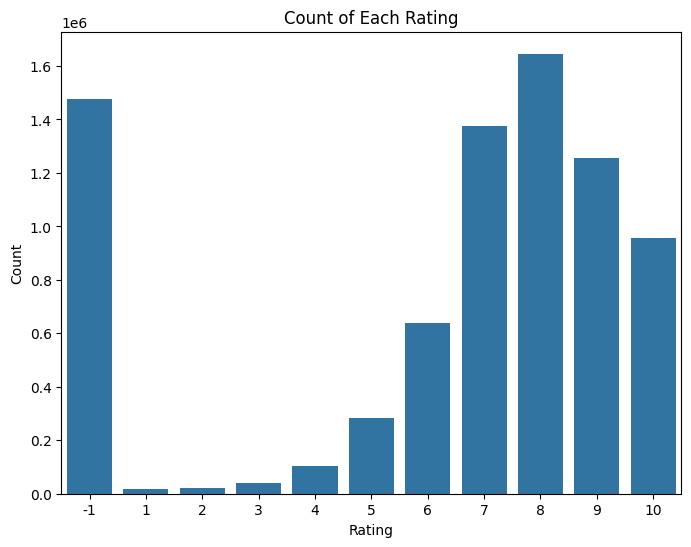

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=rating)
plt.title('Count of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

###Cleaning Data

In [11]:
rating.isna().sum()

,0
user_id,0
anime_id,0
rating,0


###Feature Engineering

Dataset rating telah memiliki fitur data yang diperlukan untuk mengembangkan model collaborative filtering nantinya.

###Data Preparation

Dalam melakukan collaborative filtering, penting untuk membatasi jumlah pengguna yang memberikan rating pada setiap item karena beberapa alasan utama yang berkaitan dengan kualitas rekomendasi dan efisiensi sistem.

1. Masalah Sparsity
Membatasi jumlah pengguna membantu mengurangi sparsity pada matriks user-item, sehingga mempermudah sistem menemukan pola dan menghasilkan rekomendasi yang lebih akurat.

2. Cold Start Problem
Dengan membatasi jumlah pengguna, sistem dapat lebih fokus pada data yang ada, mengurangi dampak dari item atau pengguna baru yang belum memiliki cukup informasi.

3. Efisiensi Komputasi
Membatasi data membuat proses perhitungan similarity dan prediksi lebih cepat dan efisien, sehingga meningkatkan pengalaman pengguna.

Langkah pertama untuk dapat membatasi pemberian penilaian nantinya harus memeriksa tiap entri user yang memberikan rating terlebih dahulu

In [ ]:
print('Jumlah user_id: ', len(rating.user_id.unique()))
print('Jumlah anime_id: ', len(rating.anime_id.unique()))

Jumlah user_id:  42693
Jumlah anime_id:  9856


Bisa disimpulkan ada fakta dimana user memberikan rating lebih dari satu anime

In [ ]:
rating_per_user = rating.groupby('user_id').size()

# Melihat jumlah rata rata anime yang dirating oleh user
print('Jumlah rata_rata anime yang dirating oleh user: ', rating_per_user.mean())

Jumlah rata_rata anime yang dirating oleh user:  105.43946314384091


Dari informasi tersebut, maka jumlah batasan pemberian rating adalah 50 untuk menjaga informasi tetap banyak sehingga akurasi bisa tinggi di pengembangan model. User yang tidak memberikan rating sebanyak 50 maka akan dihapus sedangkan yang memberikan rating lebih dari 50, pemberian ratingnya akan dihapus.

In [ ]:
# Mendapatkan user yang memberikan setidaknya 50 rating
valid_users = rating_per_user[rating_per_user >= 50].index

# Menyaring dataset untuk hanya menyertakan user yang valid
cf_rating = rating[rating['user_id'].isin(valid_users)]

# Membatasi jumlah rating per user hingga maksimal 50
cf_rating = (
    cf_rating.groupby('user_id')
    .head(50)  # Mengambil 50 rating pertama untuk setiap user
    .reset_index(drop=True)
)

print('Dataset setelah filter:')
print(cf_rating.head())

Dataset setelah filter:
   user_id  anime_id  rating
0        1      20.0    -1.0
1        1      24.0    -1.0
2        1      79.0    -1.0
3        1     226.0    -1.0
4        1     241.0    -1.0


In [ ]:
cf_rating.shape

(1151900, 3)

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = cf_rating['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [1, 3, 4, 5, 7, 11, 13, 14, 17, 21, 23, 24, 26, 27, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 43, 44, 46, 48, 50, 51, 52, 54, 62, 66, 71, 73, 75, 77, 79, 80, 81, 87, 89, 90, 93, 95, 98, 99, 102, 104, 106, 107, 108, 109, 111, 112, 120, 122, 123, 125, 126, 127, 128, 129, 130, 133, 135, 139, 141, 145, 147, 148, 151, 152, 155, 158, 159, 160, 163, 165, 166, 167, 169, 170, 171, 172, 173, 177, 179, 183, 185, 186, 188, 189, 190, 191, 192, 198, 200, 201, 202, 210, 213, 214, 216, 217, 219, 225, 226, 228, 231, 232, 233, 234, 235, 236, 242, 244, 245, 246, 247, 248, 249, 250, 252, 253, 256, 259, 261, 266, 268, 269, 270, 271, 273, 274, 280, 281, 282, 285, 288, 289, 290, 293, 294, 295, 296, 297, 298, 300, 301, 303, 308, 310, 312, 315, 317, 320, 321, 322, 324, 325, 326, 332, 336, 337, 338, 339, 340, 341, 342, 345, 346, 348, 349, 350, 352, 353, 354, 359, 361, 363, 365, 366, 367, 368, 370, 371, 372, 373, 375, 379, 381, 382, 384, 385, 387, 392, 393, 394, 395, 396, 398, 400, 401, 405, 407, 41

In [ ]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = cf_rating['anime_id'].unique().tolist()
print('list anime_id: ', anime_ids)

# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
print('encoded anime_id : ', anime_to_anime_encoded)

# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}
print('encoded angka ke anime_id: ', anime_encoded_to_anime)

list anime_id:  [20.0, 24.0, 79.0, 226.0, 241.0, 355.0, 356.0, 442.0, 487.0, 846.0, 936.0, 1546.0, 1692.0, 1836.0, 2001.0, 2025.0, 2144.0, 2787.0, 2993.0, 3455.0, 4063.0, 4214.0, 4224.0, 4581.0, 4744.0, 4898.0, 4999.0, 5034.0, 5277.0, 5667.0, 5781.0, 5958.0, 6163.0, 6205.0, 6324.0, 6500.0, 6547.0, 6682.0, 6707.0, 6747.0, 6773.0, 6793.0, 7088.0, 7148.0, 7593.0, 7739.0, 7858.0, 8074.0, 8407.0, 8424.0, 154.0, 170.0, 199.0, 225.0, 341.0, 430.0, 527.0, 552.0, 813.0, 1119.0, 1121.0, 1122.0, 1132.0, 1292.0, 1313.0, 1526.0, 1535.0, 1564.0, 1689.0, 1764.0, 1943.0, 2201.0, 2404.0, 2847.0, 3588.0, 4026.0, 5114.0, 5231.0, 6178.0, 6702.0, 6880.0, 7695.0, 9107.0, 9135.0, 9760.0, 9917.0, 9919.0, 9989.0, 10408.0, 10507.0, 11111.0, 11703.0, 11737.0, 11757.0, 11759.0, 11771.0, 12671.0, 14075.0, 6.0, 72.0, 121.0, 150.0, 166.0, 205.0, 857.0, 1498.0, 1691.0, 2966.0, 4970.0, 5341.0, 6347.0, 8525.0, 10165.0, 10620.0, 14513.0, 14765.0, 16009.0, 16498.0, 16742.0, 16890.0, 17265.0, 17505.0, 17777.0, 18115.0, 18

In [ ]:
# Mapping userID ke dataframe user
cf_rating['user'] = cf_rating['user_id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe anime
cf_rating['anime'] = cf_rating['anime_id'].map(anime_to_anime_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah anime
num_anime = len(anime_encoded_to_anime)
print(num_anime)

# Mengubah rating menjadi nilai float
cf_rating['rating'] = cf_rating['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(cf_rating['rating'])

# Nilai maksimal rating
max_rating = max(cf_rating['rating'])

print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

23038
5767
Number of User: 23038, Number of Anime: 5767, Min Rating: -1.0, Max Rating: 10.0


#Content Based Filtering

In [ ]:
# Membuat dictionary untuk data , 'anime_id', 'name', 'genre'
fix_anime = pd.DataFrame({
    'id': anime_id,
    'name': anime_name,
    'genre': anime_genre
})
fix_anime.head()

,id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, s..."
3,9253,Steins;Gate,"scifi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, s..."


##One-Hot Encoding

In [ ]:
genre_list = []

# Membuat daftar genre unik
for index in fix_anime.index:
    temp = fix_anime['genre'][index].split(',')
    for i in temp:
        if i not in genre_list:
            genre_list.append(i)

onehot_df = pd.DataFrame(0, index=fix_anime.index, columns=genre_list)

# Mengisi nilai 1 untuk genre yang sesuai
for index in fix_anime.index:
    temp = fix_anime['genre'][index].split(',')
    for i in temp:
        onehot_df.loc[index, i] = 1

fix_anime = pd.concat([fix_anime, onehot_df], axis=1).fillna(0)
print(fix_anime.head())

      id                              name  \
0  32281                    Kimi no Na wa.   
1   5114  Fullmetal Alchemist: Brotherhood   
2  28977                          Gintama°   
3   9253                       Steins;Gate   
4   9969                     Gintama&#039;   

                                               genre  Drama   Romance  \
0               Drama, Romance, School, Supernatural      1         1   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...      0         0   
2  Action, Comedy, Historical, Parody, Samurai, s...      0         0   
3                                    scifi, Thriller      0         0   
4  Action, Comedy, Historical, Parody, Samurai, s...      0         0   

    School   Supernatural  Action   Adventure   Drama  ...  Supernatural  \
0        1              1       0           0       0  ...             0   
1        0              0       1           1       1  ...             0   
2        0              0       1           0       0  .

##TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(fix_anime['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martial',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'power', 'psychological', 'romance', 'samurai', 'school', 'scifi',
       'seinen', 'shoujo', 'shounen', 'sliceoflife', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(fix_anime['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(12232, 44)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29450574, 0.31749916, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.26112763, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama anime

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=fix_anime.name
).sample(22, axis=1).sample(10, axis=0)

,power,military,ai,adventure,samurai,supernatural,historical,josei,sliceoflife,romance,...,music,arts,martial,action,shounen,super,parody,school,comedy,hentai
name,,,,,,,,,,,,,,,,,,,,,
Choujin Locke: Mirror Ring,0.602484,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.347034,0.0,0.602484,0.0,0.000000,0.000000,0.0
Sora no Manimani Specials,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.651672,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.651672,0.388134,0.0
Ginga Kikoutai Majestic Prince,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.285467,0.0,0.000000,0.0,0.383739,0.000000,0.0
Kakumeiki Valvrave 2nd Season,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.395302,0.0,0.000000,0.0,0.000000,0.000000,0.0
GA: Geijutsuka Art Design Class,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.506473,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.506473,0.301654,0.0
Seikatsu Shidou!! Anime Edition,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
Gantz,0.000000,0.0,0.0,0.0,0.0,0.391049,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.277280,0.0,0.000000,0.0,0.000000,0.000000,0.0
Steins;Gate Movie: Fuka Ryouiki no Déjà vu,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
To Heart 2 AD Plus,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


##Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14778251, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14778251, 1.        , 0.18609923, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18609923, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=fix_anime['name'], columns=fix_anime['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12232, 12232)


name,Brave 10,Sentou Mecha Xabungle,Gaza: Changing the World,Tales of Zestiria the X: Saiyaku no Jidai,Hello Kitty no Kieta Santa-san no Okurimono
name,,,,,
Mamoru-kun ni Megami no Shukufuku wo!,0.000000,0.000000,0.000000,0.000000,0.000000
Robot Carnival,0.000000,0.289165,0.000000,0.509391,0.000000
Bishoujo Senshi Sailor Moon: Sailor Stars - Hero Club,0.083181,0.000000,0.218276,0.242942,0.000000
Doudou,0.000000,0.000000,0.000000,0.735287,0.000000
Karasu Tengu Kabuto,0.436149,0.000000,0.298883,0.282637,0.000000
Cyborg 009: Chou Ginga Densetsu,0.099513,0.191755,0.000000,0.287003,0.000000
X Bomber,0.157912,0.372240,0.000000,0.210627,0.382791
Himitsukessha Taka no Tsume THE PLANETARIUM: Burabura! Black Hole no Nazo,0.094771,0.000000,0.000000,0.000000,0.000000
Rockman.EXE Stream,0.139589,0.467545,0.000000,0.186187,0.000000


##Euclidean Distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_sim = euclidean_distances(tfidf_matrix)
euclidean_sim

euclidean_sim_df = pd.DataFrame(euclidean_sim, index=fix_anime['name'], columns=fix_anime['name'])
print('Shape:', euclidean_sim_df.shape)

euclidean_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12232, 12232)


name,Project A-Ko 4: Final,Nekogami Yaoyorozu,Sakura Taisen: Ouka Kenran,Shakugan no Shana Specials,Jungle wa Itsumo Hare nochi Guu Final
name,,,,,
Akiba Kei Kanojo,1.414214,1.414214,1.414214,1.414214,1.414214
Bakuon!!,1.353300,0.545286,1.414214,1.309278,0.795397
Gamba to Kawauso no Bouken,1.414214,1.414214,1.190844,1.414214,1.414214
Spoon-hime no Swing Kitchen,1.414214,1.414214,1.190844,1.414214,1.414214
Mizugi Kanojo: The Animation,1.414214,1.414214,1.414214,1.414214,1.414214
Uchuujin Tanaka Tarou,1.343069,1.325711,1.186727,1.291294,1.258321
Aikatsu! Movie,1.414214,1.239182,1.414214,1.414214,1.096384
School Days ONA,1.414214,1.414214,1.414214,1.414214,1.414214
Initial D Battle Stage,1.356340,1.202961,1.414214,1.414214,1.414214


##Mendapatkan Rekomendasi

In [ ]:
cbf_anime[cbf_anime.name.eq('Naruto')]

,anime_id,name,genre
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."


In [ ]:
def anime_cosine(nama_anime, similarity_data=cosine_sim_df, items=fix_anime[['name', 'genre']], k=10):
    """
    Rekomendasi Anime berdasarkan kemiripan Genre

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop name agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# Mendapatkan rekomendasi anime yang mirip
anime_cosine('Naruto')

,name,genre
0,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."
5,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P..."
6,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P..."
7,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P..."
8,Kyutai Panic Adventure!,"Action, Martial Arts, Shounen, Super Power"
9,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Martial Arts, Shounen, Supe..."


In [ ]:
def anime_euclidean(nama_anime, similarity_data=euclidean_sim_df, items=fix_anime[['name', 'genre']], k=10):
    """
    Rekomendasi Anime berdasarkan jarak Euclidean

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    Pada index ini, kita mengambil k dengan nilai Euclidean distance terkecil
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    index = similarity_data.loc[:, nama_anime].to_numpy().argpartition(range(k))

    # Mengambil data dengan Euclidean distance terkecil dari index yang ada
    closest = similarity_data.columns[index[:k]]

    # Drop name agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    # Membuat DataFrame hasil
    result_euclidean = pd.DataFrame(closest).merge(items).head(k)

    # Return DataFrame hasil
    return result_euclidean

In [ ]:
anime_euclidean('Naruto')

,name,genre
0,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P..."
6,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P..."
8,Kyutai Panic Adventure!,"Action, Martial Arts, Shounen, Super Power"


#Collaborative Filtering

##Splitting Data

In [ ]:
# Mengacak dataset
cf_rating = cf_rating.sample(frac=1, random_state=42)
cf_rating

,user_id,anime_id,rating,user,anime
1086294,40224,889.0,9.0,21725,264
910617,33408,5081.0,8.0,18212,298
407457,15356,177.0,5.0,8149,219
685207,25255,241.0,7.0,13704,4
860017,31432,2966.0,9.0,17200,107
...,...,...,...,...,...
110268,4134,6702.0,10.0,2205,79
259178,9689,849.0,7.0,5183,194
131932,4930,105.0,-1.0,2638,698
671155,24772,614.0,7.0,13423,3740


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = cf_rating[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = cf_rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * cf_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[21725   264]
 [18212   298]
 [ 8149   219]
 ...
 [ 2638   698]
 [13423  3740]
 [ 2439   697]] [0.90909091 0.81818182 0.54545455 ... 0.         0.72727273 0.72727273]


In [ ]:
class RecommenderNet(tf.keras.Model):
  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_anime, 20) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 15,
    validation_data = (x_val, y_val)
)

Epoch 1/15
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.6272 - root_mean_squared_error: 0.3326 - val_loss: 0.5691 - val_root_mean_squared_error: 0.2885
Epoch 2/15
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.5572 - root_mean_squared_error: 0.2789 - val_loss: 0.5306 - val_root_mean_squared_error: 0.2546
Epoch 3/15
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.5234 - root_mean_squared_error: 0.2489 - val_loss: 0.5073 - val_root_mean_squared_error: 0.2336
Epoch 4/15
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.5024 - root_mean_squared_error: 0.2297 - val_loss: 0.4946 - val_root_mean_squared_error: 0.2223
Epoch 5/15
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4912 - root_mean_squared_error: 0.2199 - val_loss: 0.4880 - val_root_mean_squared_error: 0.2164
Epoch 6/15
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.4851 - root_mean_squared_error: 0.2145 - val_loss: 0.4847 - val_root_mean_squared_error: 0.2137
Epoch 7/15
7200/7200 ━━━━━━━━━━━━━

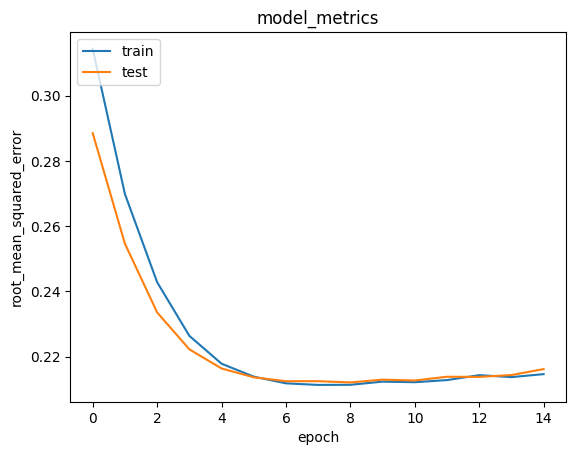

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# prompt: gunakan model untuk merekomendasi

def recommend_anime_cf(user_id, model, k=10):
    """
    Rekomendasi anime menggunakan Collaborative Filtering.

    Args:
        user_id: ID pengguna yang ingin direkomendasikan anime.
        model: Model Collaborative Filtering yang sudah dilatih.
        k: Jumlah anime yang direkomendasikan.

    Returns:
        DataFrame dengan anime yang direkomendasikan.
    """

    try:
        user_encoded = user_to_user_encoded[user_id]  # Encode user ID
    except KeyError:
        print(f"User ID {user_id} not found in the dataset.")
        return pd.DataFrame()


    anime_not_watched = cf_rating[~cf_rating['user_id'].isin([user_id])]['anime_id'].unique()
    anime_not_watched = list(set(anime_not_watched).intersection(set(anime_ids)))

    anime_not_watched_encoded = [anime_to_anime_encoded[x] for x in anime_not_watched]

    user_anime_array = np.array([[user_encoded, anime] for anime in anime_not_watched_encoded])

    ratings = model.predict(user_anime_array).flatten()

    top_ratings_indices = ratings.argsort()[-k:][::-1]
    recommended_anime_ids = [anime_encoded_to_anime[anime_not_watched_encoded[x]] for x in top_ratings_indices]

    recommended_anime = cbf_anime[cbf_anime['anime_id'].isin(recommended_anime_ids)][['name', 'genre']].reset_index(drop=True)
    return recommended_anime

In [ ]:
recommend_anime_cf(1,model)

181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


,name,genre
0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
1,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power"
2,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, s..."
3,Gintama,"Action, Comedy, Historical, Parody, Samurai, s..."
4,Great Teacher Onizuka,"Comedy, Drama, School, Shounen, sliceoflife"
5,Shouwa Genroku Rakugo Shinjuu,"Drama, Historical, Josei"
6,Kingdom 2nd Season,"Action, Historical, Military, Seinen"
7,Sakamichi no Apollon,"Drama, Josei, Music, Romance, School"
8,Kemono no Souja Erin,"Drama, Fantasy"
9,Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#...,"Action, Comedy, Drama, Magic, Super Power"


In [ ]:
# prompt: evaluasi model yang dibuat

def evaluate_cf_recommendations(recommendations, user_id, rating_df):
    """
    Evaluates collaborative filtering recommendations by comparing recommended anime genres to the user's past ratings.

    Args:
        recommendations: DataFrame of recommended anime with 'name' and 'genre' columns.
        user_id: The ID of the user for whom recommendations were generated.
        rating_df: The DataFrame containing user ratings.

    Returns:
        A dictionary containing evaluation metrics.
    """

    user_rated_anime = rating_df[rating_df['user_id'] == user_id]
    user_genres = []
    for _, row in user_rated_anime.iterrows():
      anime_id = row['anime_id']
      try:
        user_genres.extend(cbf_anime[cbf_anime['anime_id'] == anime_id]['genre'].iloc[0].split(','))
      except IndexError:
        # Handle cases where anime_id is not found in cbf_anime
        print(f"Anime ID {anime_id} not found in cbf_anime dataframe")
        continue
    user_genres = list(set(user_genres))


    matching_genres_count = 0
    for _, row in recommendations.iterrows():
        recommended_genres = row['genre'].split(',')
        for genre in recommended_genres:
            if genre in user_genres:
                matching_genres_count += 1
                break

    precision = matching_genres_count / len(recommendations) if len(recommendations) > 0 else 0
    recall = matching_genres_count / len(user_genres) if len(user_genres) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
      "precision": precision,
      "recall": recall,
      "f1_score": f1_score,
      "matching_genres_count": matching_genres_count
    }


# Example usage
user_id_to_evaluate = 3  # Replace with the desired user ID
recommendations = recommend_anime_cf(user_id_to_evaluate, model)

if not recommendations.empty:
    evaluation_results = evaluate_cf_recommendations(recommendations, user_id_to_evaluate, cf_rating)

    print(f"Evaluation Results for User {user_id_to_evaluate}:")
    print(f"Precision: {evaluation_results['precision']:.4f}")
    print(f"Recall: {evaluation_results['recall']:.4f}")
    print(f"F1-score: {evaluation_results['f1_score']:.4f}")
    print(f"Matching Genres Count: {evaluation_results['matching_genres_count']}")

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Evaluation Results for User 3:
Precision: 1.0000
Recall: 0.2857
F1-score: 0.4444
Matching Genres Count: 10
